<a href="https://colab.research.google.com/github/margazadasha/Machine-learning-ML/blob/main/%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D0%B7%D0%B0_4_6%D0%A4%D0%86%D0%A2_%D0%9F%D0%A0%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №3
Лінійна регресія.
#Завдання 1. Diabetes Dataset.

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Завантажуємо датасет.
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

#1. Виводимо перших 5 рядків.
print("Перші 5 рядків датасету:")
df.head()

Перші 5 рядків датасету:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
#2. Перевірка наявності пропусків.
print("\nПеревірка наявності пропусків:")
df.isnull().sum()


Перевірка наявності пропусків:


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
#3. Перевірка наявносты дублікатів.
duplicates = df.duplicated().sum()
print("\nКількість дублікатів:", duplicates)


Кількість дублікатів: 0


In [ ]:
#4. Перевірка унікальних значень у стовпчику 'sex'.
unique_values = df['sex'].unique()
print("\nУнікальні значення у стовпчику 'sex':", unique_values)


Унікальні значення у стовпчику 'sex': [ 0.05068012 -0.04464164]


In [ ]:
#Заміна бінарних ознак у стовпчику 'sex'.
df['sex'] = df['sex'].replace({-0.04464164: 0, 0.05068012: 1}).astype(int)

In [ ]:
#5. Перевірка типу даних датасету.
print("\nТипи даних у датасеті:")
df.dtypes


Типи даних у датасеті:


,0
age,float64
sex,int64
bmi,float64
bp,float64
s1,float64
s2,float64
s3,float64
s4,float64
s5,float64
s6,float64



Кореляції з 'target':
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
s3       -0.394789
sex            NaN
Name: target, dtype: float64


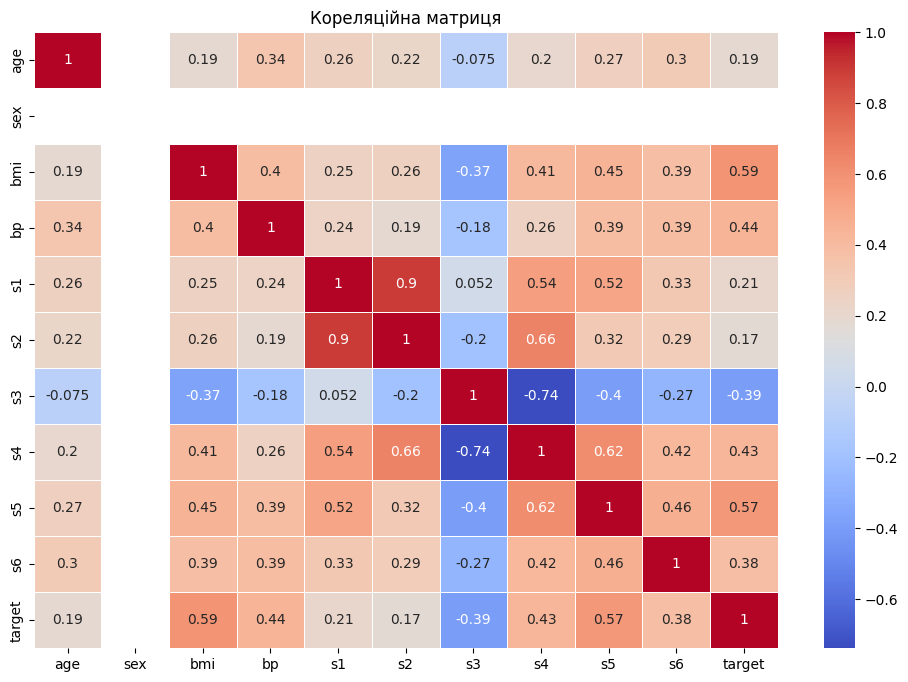

In [ ]:
#6. Обчислення кореляції між прогресом діабету та іншими ознаками.
correlation_matrix = df.corr()

#Отримання кореляцій з 'target'.
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

print("\nКореляції з 'target':")
print(target_correlation)

#Побудова теплової карти кореляції.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

In [ ]:
#7. Масштабування ознак.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])

In [ ]:
#8. Розподіл даних на тренувальну і тестову вибірки.
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['target'], test_size=0.2, random_state=42)

In [ ]:
#9. Побудова моделей лінійної регресії і RandomForest регресії на основі більш корелюючих ознак.

#Використовуємо всі ознаки з високою кореляцією (можна вибрати топ-5 або топ-10 ознак).
top_features = target_correlation.index[1:6]  # Вибір топ-5 найбільш корелюючих ознак.

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

#Лінійна регресія.
lin_reg = LinearRegression()
lin_reg.fit(X_train_top, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_top)

#RandomForest регресія.
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_top, y_train)
y_pred_rf_reg = rf_reg.predict(X_test_top)

In [ ]:
#10. Вивід коефіцієнту детермінації і середньоквадратичної помилки.
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)

r2_rf_reg = r2_score(y_test, y_pred_rf_reg)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)

print("\nЛінійна регресія:")
print("Коефіцієнт детермінації (R^2):", r2_lin_reg)
print("Середньоквадратична помилка (MSE):", mse_lin_reg)

print("\nRandomForest регресія:")
print("Коефіцієнт детермінації (R^2):", r2_rf_reg)
print("Середньоквадратична помилка (MSE):", mse_rf_reg)


Лінійна регресія:
Коефіцієнт детермінації (R^2): 0.45268787688199763
Середньоквадратична помилка (MSE): 2899.7426820819774

RandomForest регресія:
Коефіцієнт детермінації (R^2): 0.4174542196138553
Середньоквадратична помилка (MSE): 3086.4159449438207


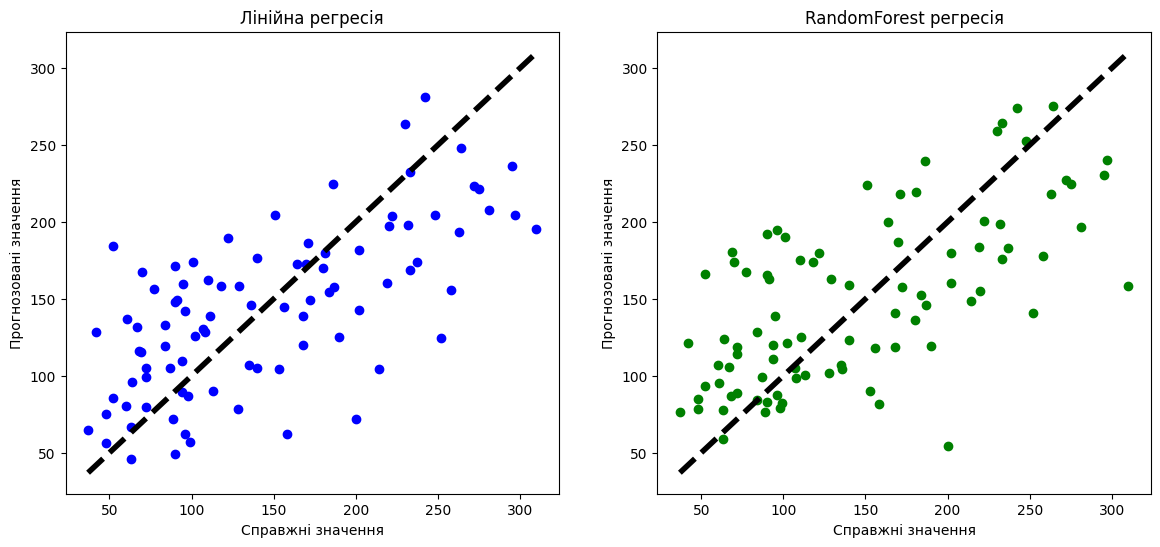

In [ ]:
#11. Побудова графіків.
plt.figure(figsize=(14, 6))

#Лінійна регресія.
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin_reg, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія')

#RandomForest регресія.
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf_reg, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('RandomForest регресія')

plt.show()

In [ ]:
#12. Вивід справжніх та прогнозованих значень.
print("\nСправжні та прогнозовані значення для Лінійної регресії:")
comparison = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані значення': y_pred_lin_reg})
print(comparison.head(10))

print("\nСправжні та прогнозовані значення для RandomForest регресії:")
comparison_rf = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані значення': y_pred_rf_reg})
print(comparison_rf.head(10))


Справжні та прогнозовані значення для Лінійної регресії:
     Справжні значення  Прогнозовані значення
287              219.0             160.079344
211               70.0             167.202676
72               202.0             181.557882
321              230.0             263.634780
73               111.0             138.707761
418               84.0             119.541729
367              242.0             281.503699
354              272.0             223.658060
281               94.0              89.158830
148               96.0             142.159825

Справжні та прогнозовані значення для RandomForest регресії:
     Справжні значення  Прогнозовані значення
287              219.0                 184.01
211               70.0                 174.17
72               202.0                 179.52
321              230.0                 258.85
73               111.0                 125.14
418               84.0                  84.56
367              242.0                 274.34
354   

Висновок: В даному завданні було виконано попередній аналіз даних датасету Diabetes Dataset, включаючи обробку пропусків, перевірку дублікатів та заміну бінарних ознак, а також були побудовані дві моделі регресії: Лінійна регресія та RandomForest регресія та їх графіки. Модель RandomForest показала кращі результати з вищим коефіцієнтом детермінації та нижчою середньоквадратичною помилкою.Таким чином на основі результатів можна зробити висновок, що RandomForest регресія краще справляється з прогнозуванням прогресу діабету на основі даних ознак.

#Завдання 2.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = fetch_california_housing()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Перевірка на пропущені значення.
print("\nПеревірка на пропущені значення:")
print(df.isnull().sum())

#Перевірка наявності дублікатів.
print("\nПеревірка наявності дублікатів:")
print(df.duplicated().sum())

#Виведення розміру датасету.
print("\nРозмір датасету:")
print(df.shape)

#Перевірка типів даних датасету.
print("\nТипи даних датасету:")
print(df.dtypes)


Перевірка на пропущені значення:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Перевірка наявності дублікатів:
0

Розмір датасету:
(20640, 9)

Типи даних датасету:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object



Кореляції з 'target':
target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64


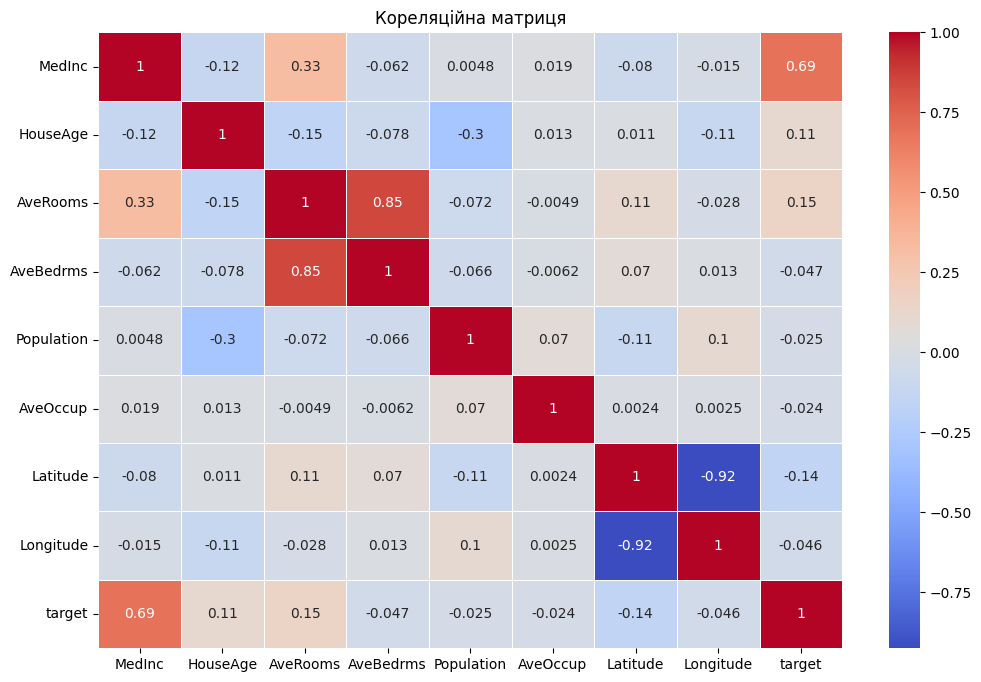

In [ ]:
#Обчислення кореляції між ціною житла та іншими ознаками.
correlation_matrix = df.corr()

# Отримання кореляцій з 'target'.
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

print("\nКореляції з 'target':")
print(target_correlation)

# Побудова теплової карти кореляції.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

In [ ]:
#Масштабування ознак.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])

#Поділ даних на тренувальну і тестову вибірки.
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['target'], test_size=0.2, random_state=42)

In [ ]:
#Побудова 3-х моделей: лінійної регресії, RandomForest регресії, Ridge.
#Підбір оптимальних параметрів за допомогою GridSearch.

#Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

#RandomForest регресія.
rf_reg = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
best_rf_reg = grid_search_rf.best_estimator_
y_pred_rf_reg = best_rf_reg.predict(X_test)

#Ridge регресія.
ridge = Ridge()
param_grid_ridge = {'alpha': [0.1, 1, 10]}
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

In [ ]:
#Вивід коефіцієнту детермінації та середньоквадратичної помилки.
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)

r2_rf_reg = r2_score(y_test, y_pred_rf_reg)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("\nЛінійна регресія:")
print("Коефіцієнт детермінації (R^2):", r2_lin_reg)
print("Середньоквадратична помилка (MSE):", mse_lin_reg)

print("\nRandomForest регресія:")
print("Коефіцієнт детермінації (R^2):", r2_rf_reg)
print("Середньоквадратична помилка (MSE):", mse_rf_reg)

print("\nRidge регресія:")
print("Коефіцієнт детермінації (R^2):", r2_ridge)
print("Середньоквадратична помилка (MSE):", mse_ridge)


Лінійна регресія:
Коефіцієнт детермінації (R^2): 0.575787706032451
Середньоквадратична помилка (MSE): 0.5558915986952441

RandomForest регресія:
Коефіцієнт детермінації (R^2): 0.8056479624647508
Середньоквадратична помилка (MSE): 0.2546806549256028

Ridge регресія:
Коефіцієнт детермінації (R^2): 0.5757907979394906
Середньоквадратична помилка (MSE): 0.5558875470324994


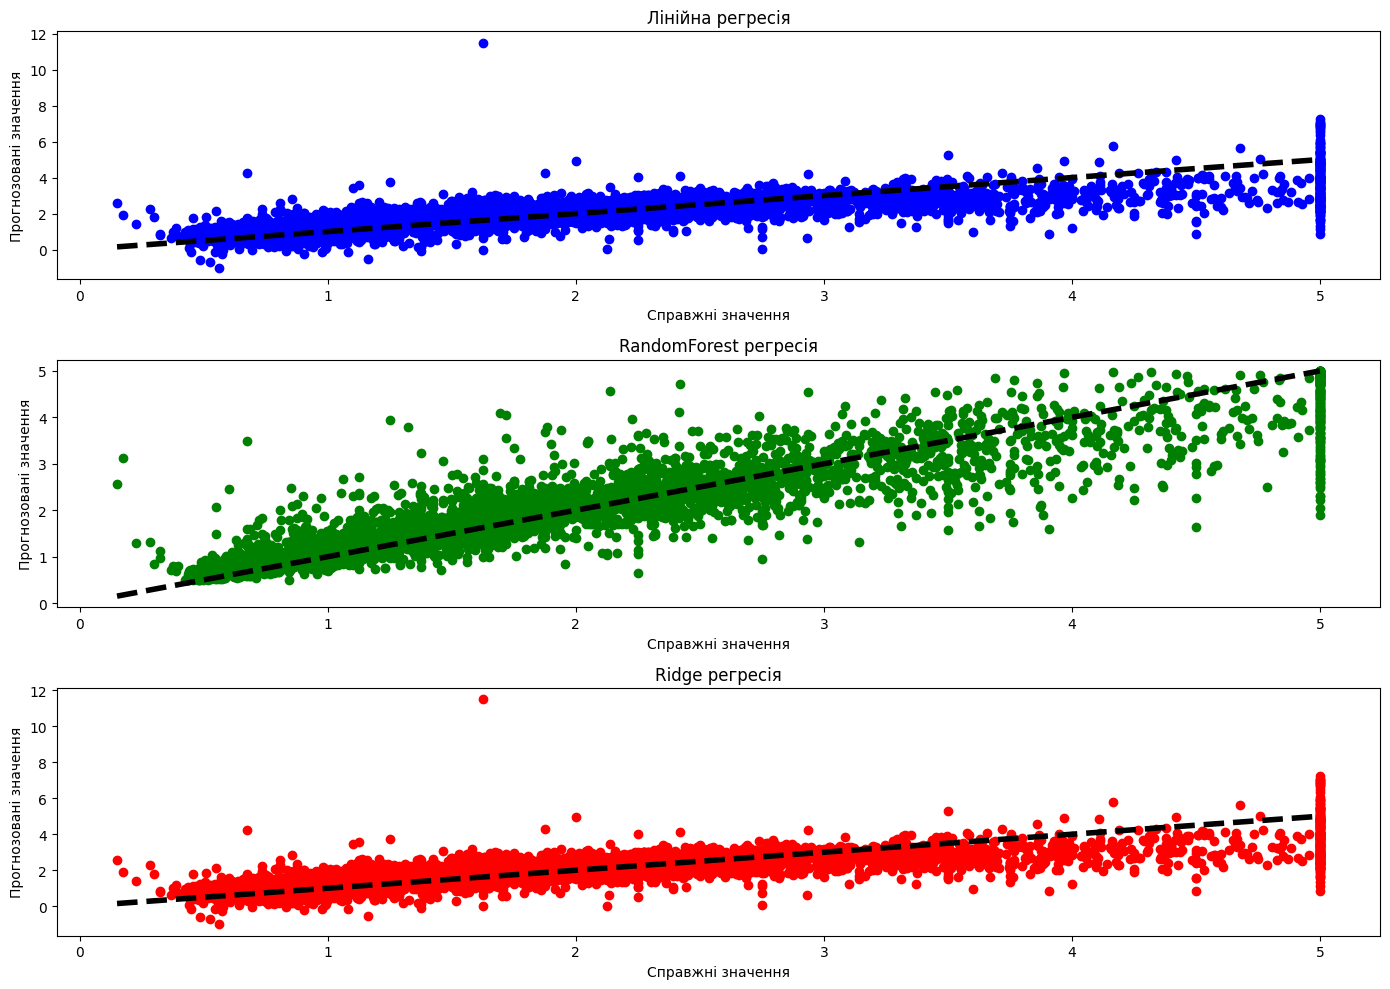

In [ ]:
#Побудова графіків.
plt.figure(figsize=(14, 10))

#Лінійна регресія.
plt.subplot(3, 1, 1)
plt.scatter(y_test, y_pred_lin_reg, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія')

#RandomForest регресія.
plt.subplot(3, 1, 2)
plt.scatter(y_test, y_pred_rf_reg, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('RandomForest регресія')

#Ridge регресія.
plt.subplot(3, 1, 3)
plt.scatter(y_test, y_pred_ridge, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Ridge регресія')

plt.tight_layout()
plt.show()

In [ ]:
#Вивід справжніх та прогнозованих значень.
print("\nСправжні та прогнозовані значення для Лінійної регресії:")
comparison = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані значення': y_pred_lin_reg})
print(comparison.head(10))

print("\nСправжні та прогнозовані значення для RandomForest регресії:")
comparison_rf = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані значення': y_pred_rf_reg})
print(comparison_rf.head(10))

print("\nСправжні та прогнозовані значення для Ridge регресії:")
comparison_ridge = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані значення': y_pred_ridge})
print(comparison_ridge.head(10))


Справжні та прогнозовані значення для Лінійної регресії:
       Справжні значення  Прогнозовані значення
20046            0.47700               0.719123
3024             0.45800               1.764017
15663            5.00001               2.709659
20484            2.18600               2.838926
9814             2.78000               2.604657
13311            1.58700               2.011754
7113             1.98200               2.645500
7668             1.57500               2.168755
18246            3.40000               2.740746
5723             4.46600               3.915615

Справжні та прогнозовані значення для RandomForest регресії:
       Справжні значення  Прогнозовані значення
20046            0.47700               0.502369
3024             0.45800               0.738781
15663            5.00001               4.891107
20484            2.18600               2.535699
9814             2.78000               2.253975
13311            1.58700               1.655953
7113            

Висновок: В даному завданні так само, як і в попередньому, було виконано попередній аналіз даних тільки вже датасету California Housing Dataset. На основі аналізу кореляцій було визначено найбільш корелюючі ознаки з ціною житла, а також побудовано три моделі регресії: лінійна регресія, RandomForest регресія та Ridge регресія та їх графіки, які показують відповідність прогнозованих значень справжнім. Модель RandomForest показала кращі результати з вищим коефіцієнтом детермінації та нижчою середньоквадратичною помилкою. Таким чином на основі результатів можна зробити висновок, що RandomForest регресія краще справляється з прогнозуванням ціни житла в Каліфорнії.